The hMFC is a complex model with many group-level (hierarchical) and subject-level parameters to be estimated. On simulated data the model works great.
However, fitting hMFC on empirical data sometimes results in quirky model behavior.
In this troubleshooting tutorial we’ll discuss how to recognize some potential quirky behavior and how to solve it. At the heart of our solution will often be fixing some group-level (hierarchical) parameter such that they are not estimated.

### If a0 and all individual a’s go down over iterations:

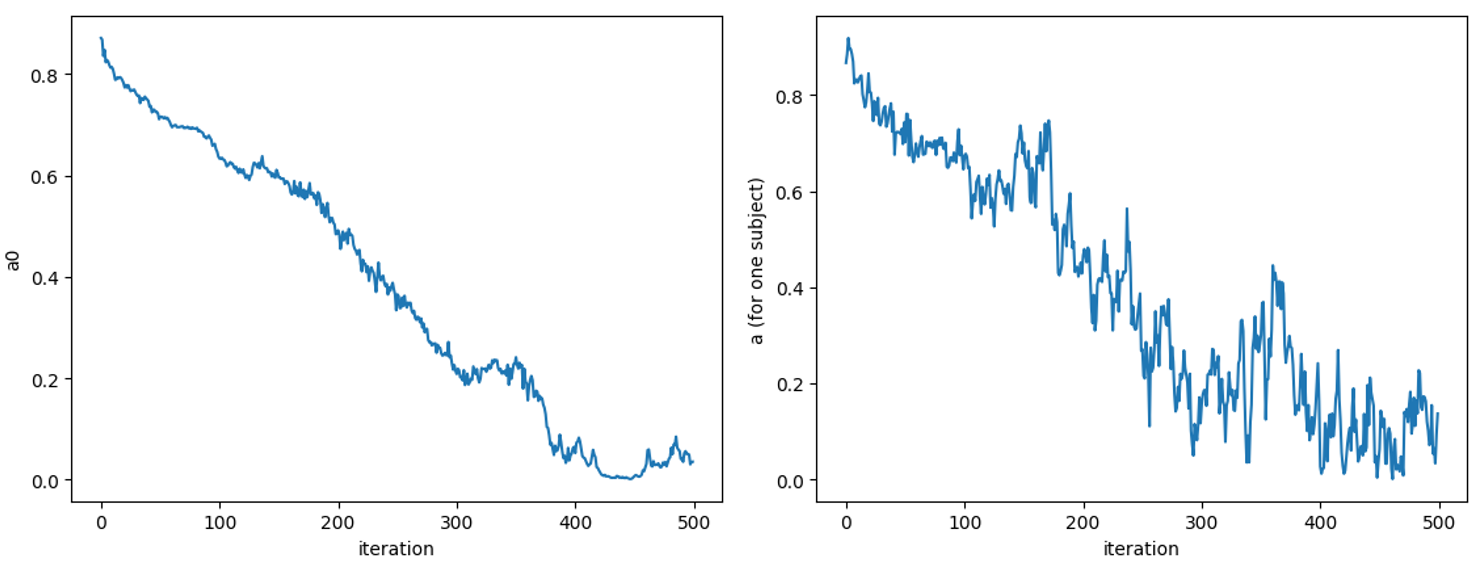

- **Reason**: the cause of this problem lies with the mean-centering of the criterion trajectory. This is needed to keep the intercept identifiable, as the mean of the criterion trajectory and the intercept both can capture an overall bias, resulting in an identification issue. The mean-centering of the criterion trajectory only happens after the estimation and is not incorporated in the posterior directly. This means that before the centering our estimated fluctuations can be shifted all the way up or down (i.e., it doesn’t have a mean of zero). This non-zero mean can be very unlikely for the sampler since we do not incoorporate an intercept for the AR(1) process. Without this intercept the time series has by definition a mean of zero (mean = intercept/(1-AR coef)). The model tries to deal with this unlikeliness by pushing all a’s to zero (and thus also the group-level mean a0) and thus just estimating a flat line. This problem is more likely to occur with smaller datasets (<1000 trials) because with more trials, the fluctuations are more likely to have a mean of zero.
- **Solution**: Remove the mean-centering when estimating the criterion fluctuations. In hmfc.py on line 270 comment out "- x_i.mean()" such that the criterion trajectory is not mean-centered.

### If log probability keeps on increasing even after many iterations, the per-subject $\sigma^2$ for all subjects goes to zero, $\alpha$ is pushing against upper bound, and $\beta$ is going to zero:

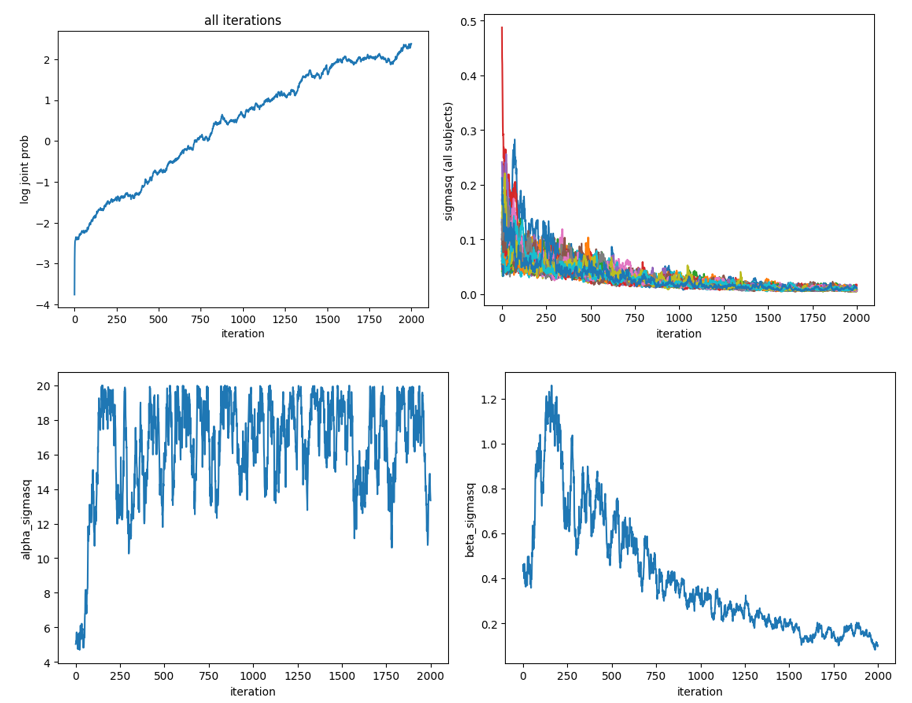

- **Reason**: the model aims to achieve a fit with the highest log joint probability possible. In the situation depicted above, the estimation procedure is trying to get $\alpha$ to be as large as possible (making it push against the upper boundary, bottom left), and making $\beta$ as small as possible (bottom right). As such, the group-level distribution for $\sigma^2$, namely the inverse gamma, becomes very narrow and steep, favoring very small values. In combination with making $\sigma^2$ small for all subjects, this results in a log probability that keeps on increasing. As a consequence, the criterion fluctuations will become deterministc (with the AR noise $\sigma^2$ being so small that $x_t$ = $ax_t$).
- **Solution**: fix $\alpha$ and $\beta$ such that they aren't estimated, by commenting out the gibbs step for $\alpha$ and $\beta$ in hmfc.py on line 511 and 512. This means that the group-level distribution for $\sigma^2$ is fixed, but the per-subject $\sigma^2$ is still freely estimated. Note: it is recommended to do a sensitivity analysis to check how much the final fitting results are influenced by the chosen $\alpha$ and $\beta$ values.